11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
844/844 - 46s - 54ms/step - accuracy: 0.9484 - loss: 0.1711 - val_accuracy: 0.9853 - val_loss: 0.0540
Epoch 2/10
844/844 - 39s - 47ms/step - accuracy: 0.9846 - loss: 0.0496 - val_accuracy: 0.9890 - val_loss: 0.0397
Epoch 3/10
844/844 - 40s - 48ms/step - accuracy: 0.9896 - loss: 0.0346 - val_accuracy: 0.9882 - val_loss: 0.0384
Epoch 4/10
844/844 - 38s - 45ms/step - accuracy: 0.9916 - loss: 0.0264 - val_accuracy: 0.9888 - val_loss: 0.0346
Epoch 5/10
844/844 - 38s - 45ms/step - accuracy: 0.9936 - loss: 0.0204 - val_accuracy: 0.9907 - val_loss: 0.0307
Epoch 6/10
844/844 - 41s - 48ms/step - accuracy: 0.9950 - loss: 0.0150 - val_accuracy: 0.9907 - val_loss: 0.0326
Epoch 7/10
844/844 - 41s - 48ms/step - accuracy: 0.9964 - loss: 0.0116 - val_accuracy: 0.9905 - val_loss: 0.0338
Epoch 8/10
844/844 - 41s - 49ms/step - accuracy: 0.9965 - loss: 0.0097 - val_accuracy: 0.9908 - val_loss: 0.0379
Epoch 9/10
844/844 - 41s - 49ms/step - accuracy: 0.9970 - loss: 0.0081 - val_accuracy: 0.9910 - 

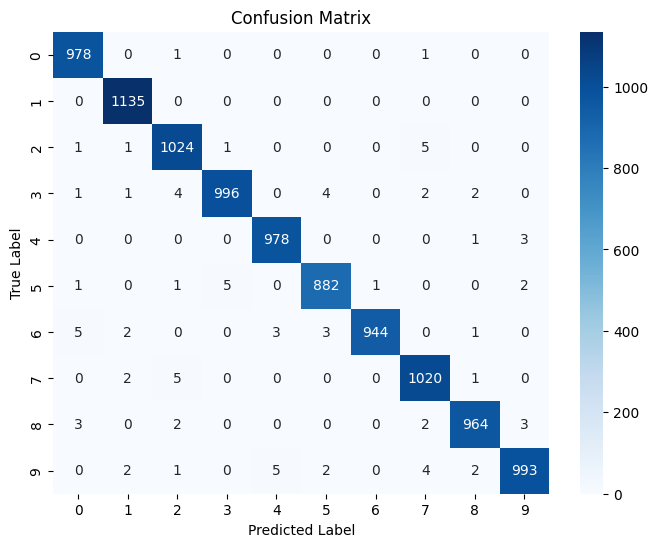


Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [1]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

# Step 2: Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to add channel dimension (grayscale = 1 channel)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Step 3: Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 output neurons for 10 classes
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(x_train, y_train_cat,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.1,
                    verbose=2)

# Step 6: Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# Step 7: Make predictions and evaluate
y_pred = model.predict(x_test, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted class labels
y_true = np.argmax(y_test_cat, axis=1)      # True class labels

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualization of confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes))